# Shikari King

## Research question/interests
How do different factors contributing to happiness, such as income, social support, freedom, and corruption, vary across different regions in the world, and how do these regional differences affect overall levels of happiness and life satisfaction?

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns
import geopandas as gpd
import geoplot as gplt


In [2]:
# Loading the dataframes to be analyzed
# Fixing the name United States
Data2015 = pd.read_csv('../../data/processed/2015_Clean_Data.csv')
Data2016 = pd.read_csv('../../data/processed/2016_Clean_Data.csv')
Data2017 = pd.read_csv('../../data/processed/2017_Clean_Data.csv')
Data2018 = pd.read_csv('../../data/processed/2018_Clean_Data.csv')
Data2019 = pd.read_csv('../../data/processed/2019_Clean_Data.csv')
Data2020 = pd.read_csv('../../data/processed/2020_Clean_Data.csv')
Data2021 = pd.read_csv('../../data/processed/2021_Clean_Data.csv')
Data2022 = pd.read_csv('../../data/processed/2022_Clean_Data.csv')
DataCombine = pd.read_csv('../../data/processed2/Overall(No-Year)_Clean_Data.csv')
DataAllYears = pd.read_csv('../../data/processed2/Overall(With-year)_Clean_Data.csv')
DataAllRegion = pd.read_csv('../../data/processed2/Overall(With-Region-Year)_Clean_Data.csv')

# Fixed the USA as it was named different for GeoPandas
datasets = [Data2015, Data2016, Data2017, Data2018, Data2019, Data2020, Data2021, Data2022, DataCombine, DataAllYears]
for data in datasets:
    data['Country'] = data['Country'].replace('United States', 'United States of America')
datasets = [Data2015, Data2016, Data2017, Data2018, Data2019, Data2020, Data2021, Data2022]
DataAllRegion.columns

Index(['Country', 'Year', 'Region', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom to make life choices', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual', 'Social support',
       'Perceptions of corruption', 'Logged GDP per capita',
       'Healthy life expectancy', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual', 'Dystopia (1.83) + residual',
       'Explained by: GDP per capita'],
      dtype='object')

In [3]:
import sys
sys.path.append('../..')

# Importing Functions to be used
from scripts import project_functions2 as pf

# Exploratory Data Analysis

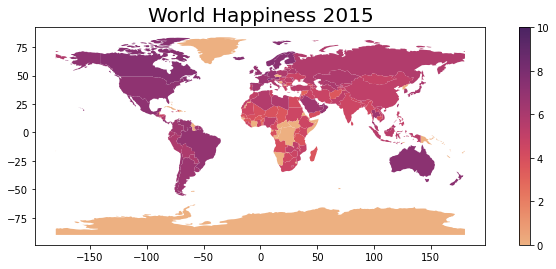

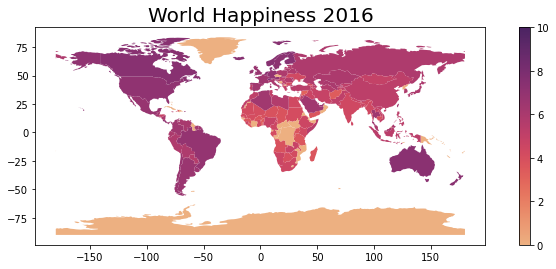

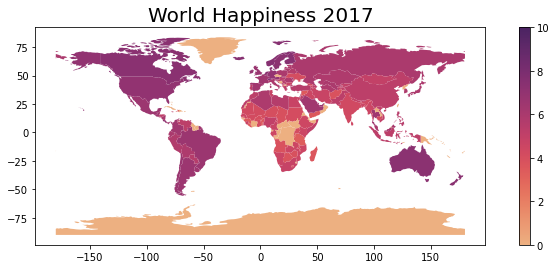

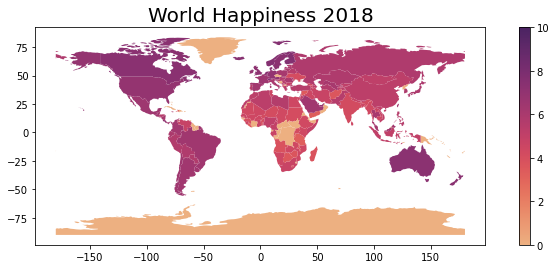

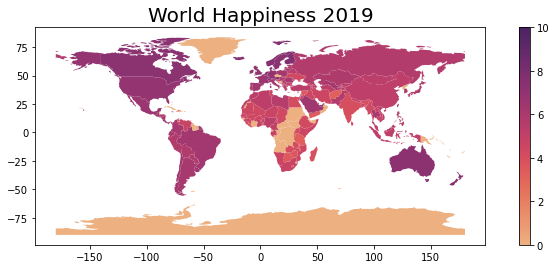

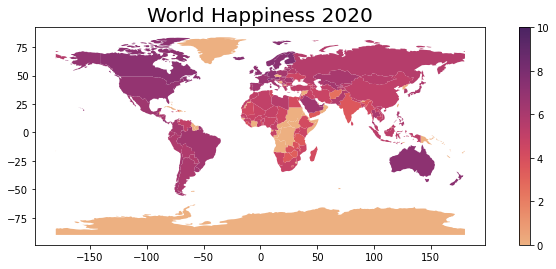

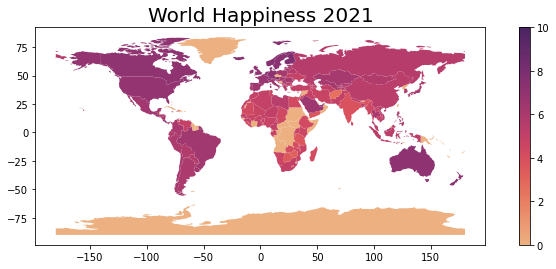

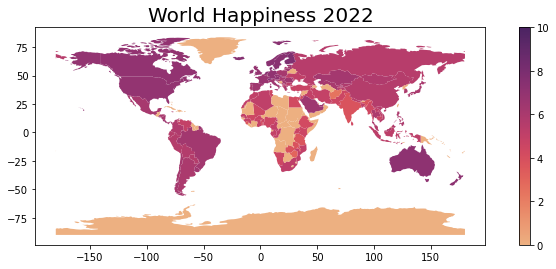

In [4]:
year = 2015
for data in datasets:
    pf.create_world_map_happiness(data,f'World Happiness {year}')
    year += 1

### The above image shows worldwide happiness in 2022 and I want to exlore the reasons as to why some countries are much happier than others

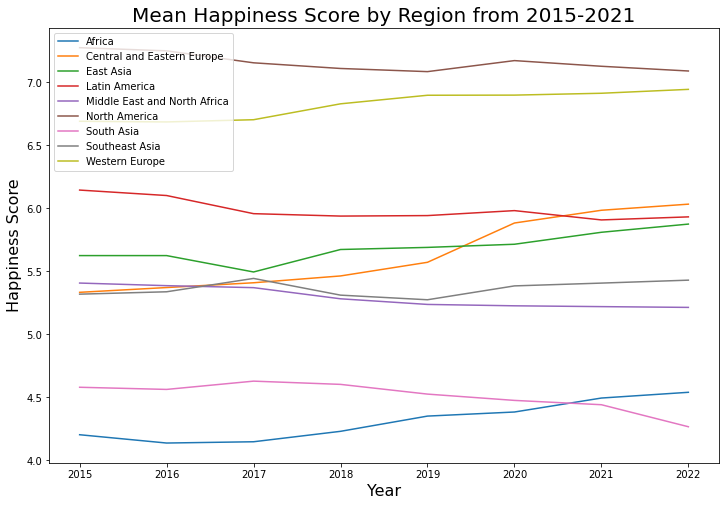

In [5]:
# Create a new dataframe with region-wise average happiness score for each year
region_data = DataAllRegion.groupby(['Year', 'Region'])['Happiness Score'].mean().reset_index()

# Plot the data
fig, ax = plt.subplots(figsize=(12, 8))

for region in region_data['Region'].unique():
    # Get the data for the current region
    region_subset = region_data[region_data['Region'] == region]
    # Plot the region's data
    ax.plot(region_subset['Year'], region_subset['Happiness Score'], label=region)

# Set the axis labels and title
ax.set_xlabel('Year', fontsize=16)
ax.set_ylabel('Happiness Score', fontsize=16)
ax.set_title('Mean Happiness Score by Region from 2015-2021', fontsize= 20)

# Add a legend
ax.legend()
plt.legend(bbox_to_anchor=(0, 1), loc='upper left')

# Show the plot
plt.show()

 ### Looking at this chart I am seeing the mean happiness over time and some regions different levels of happiness. The images of this happiness was shown above which each year having its own visulization and now I want to dig deeper into the exact GDP, freedom, etc and how this affects the happiness.

### I want to look deeper into Freedom to make life choices and its impact on happiness

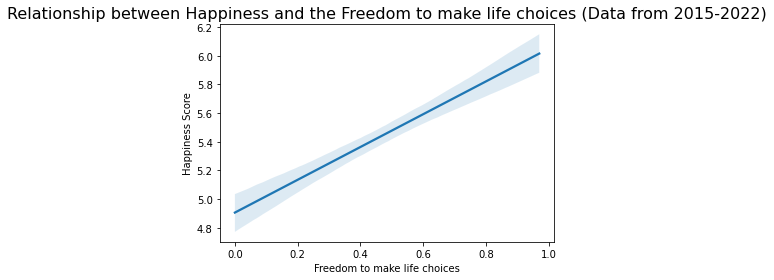

In [6]:
data = DataAllYears

# create scatter plot with regression line
sns.regplot(x='Freedom to make life choices', y='Happiness Score', data=data, scatter=False)

# add labels and title
plt.xlabel('Freedom to make life choices')
plt.ylabel('Happiness Score')
plt.title('Relationship between Happiness and the Freedom to make life choices (Data from 2015-2022)', fontsize=16)

# show plot
plt.show()

### Looking at this correlation map there is clear correlation between Freedom to Make Life choices and the level of Happiness that an area has

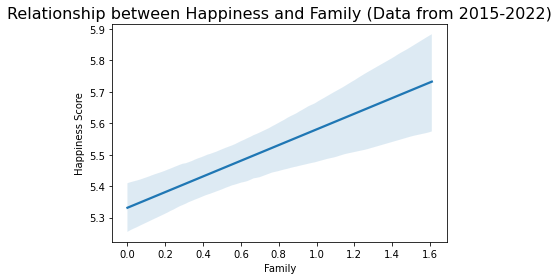

In [7]:
data = DataAllYears

# create scatter plot with regression line
sns.regplot(x='Family', y='Happiness Score', data=data, x_estimator=np.mean, scatter=False)

# add labels and title
plt.xlabel('Family')
plt.ylabel('Happiness Score')
plt.title('Relationship between Happiness and Family (Data from 2015-2022)', fontsize=16)

# show plot
plt.show()

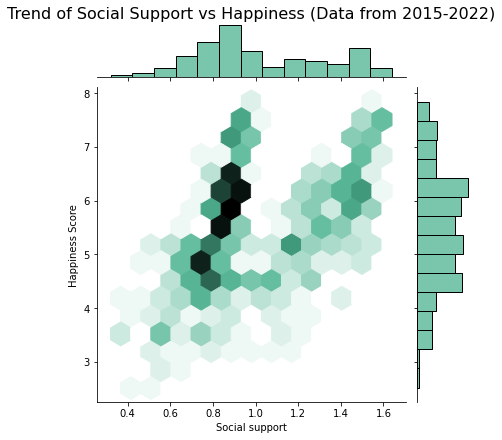

In [8]:
# filter data where Family is greater than 0
data = DataAllYears[DataAllYears['Social support'] > 0]

# create jointplot with hex bins
sns.jointplot(x='Social support', y='Happiness Score', data=data, kind="hex", color="#4CB391")

# add labels and title
plt.xlabel('Social support')
plt.ylabel('Happiness Score')
plt.title('Trend of Social Support vs Happiness (Data from 2015-2022)', fontsize=16, y=1.2)

# show plot
plt.show()

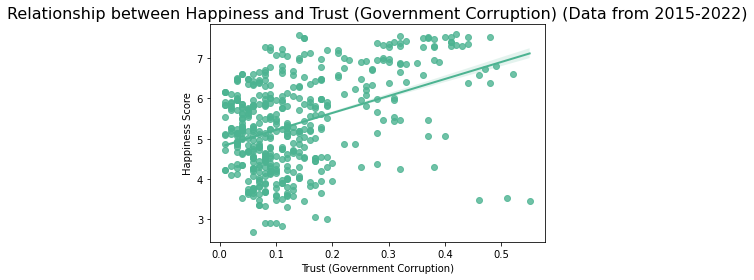

In [9]:
# filter data where Trust (Government Corruption) is greater than 0
data = DataAllYears[DataAllYears['Trust (Government Corruption)'] > 0]

# create strip plot with regression fit
sns.regplot(x='Trust (Government Corruption)', y='Happiness Score', data=data, scatter=True, ci=40, color="#4CB391", line_kws={'linewidth': 2})

# add labels and title
plt.xlabel('Trust (Government Corruption)')
plt.ylabel('Happiness Score')
plt.title('Relationship between Happiness and Trust (Government Corruption) (Data from 2015-2022)', fontsize=16)

# show plot
plt.show()

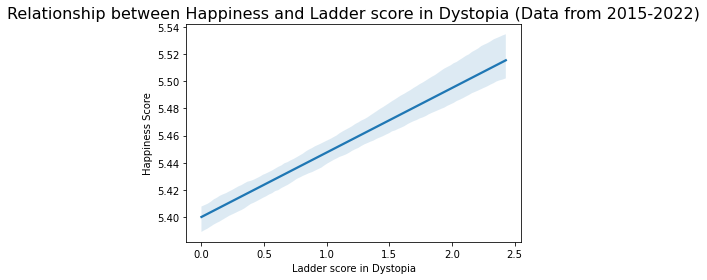

In [10]:
# create scatter plot with regression line
sns.regplot(x='Ladder score in Dystopia', y='Happiness Score', data=DataAllYears,ci=20, scatter=False)

# add labels and title
plt.xlabel('Ladder score in Dystopia')
plt.ylabel('Happiness Score')
plt.title('Relationship between Happiness and Ladder score in Dystopia (Data from 2015-2022)', fontsize=16)

# show plot
plt.show()

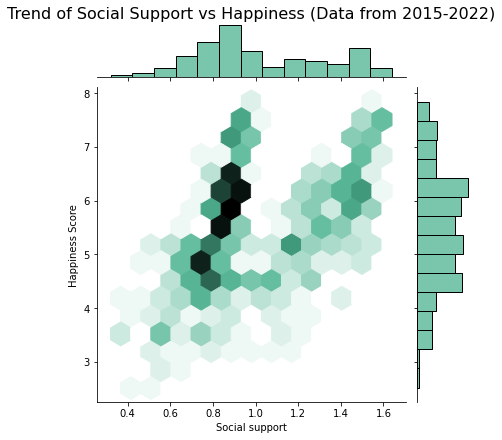

In [11]:
# filter data where Social support is greater than 0
data = DataAllYears[DataAllYears['Social support'] > 0]

# create jointplot with hex bins
sns.jointplot(x='Social support', y='Happiness Score', data=data, kind="hex", color="#4CB391")

# add labels and title
plt.xlabel('Social support')
plt.ylabel('Happiness Score')
plt.title('Trend of Social Support vs Happiness (Data from 2015-2022)', fontsize=16, y=1.2)

# show plot
plt.show()

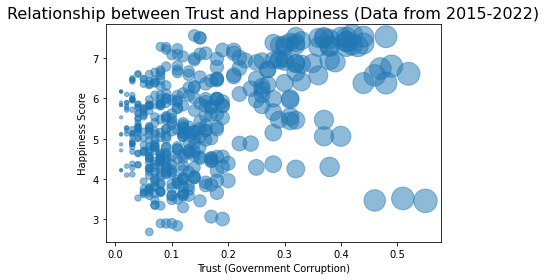

In [12]:
# filter data where Trust (Government Corruption) is greater than 0
data = DataAllYears[DataAllYears['Trust (Government Corruption)'] > 0]

# create scatter plot
plt.scatter(data['Trust (Government Corruption)'], data['Happiness Score'], s=data['Trust (Government Corruption)']*1000, alpha=0.5)

# add labels and title
plt.xlabel('Trust (Government Corruption)')
plt.ylabel('Happiness Score')
plt.title('Relationship between Trust and Happiness (Data from 2015-2022)', fontsize=16)

# show plot
plt.show()


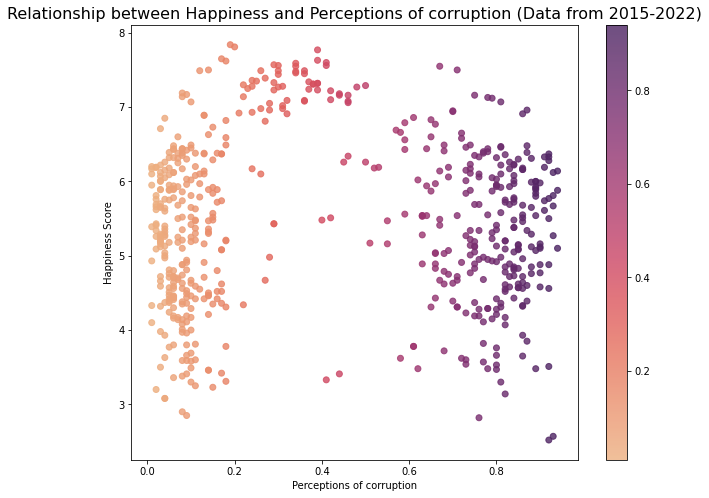

In [13]:
# Filter the data using a lambda function in assign
data = DataAllYears.assign(Perceptions_of_corruption_Filtered=lambda x: x['Perceptions of corruption'].apply(lambda y: y > 0))

# Create the scatterplot using a lambda function in loc
fig, ax = plt.subplots(figsize=(10, 8))
scatter = ax.scatter(data.loc[data['Perceptions_of_corruption_Filtered'], 'Perceptions of corruption'], 
                     data.loc[data['Perceptions_of_corruption_Filtered'], 'Happiness Score'], 
                     c=data.loc[data['Perceptions_of_corruption_Filtered'], 'Perceptions of corruption'], 
                     cmap='flare', alpha=0.8)

# Add colorbar using the mappable defined by scatter
plt.colorbar(scatter)

# Add labels and title
plt.xlabel('Perceptions of corruption')
plt.ylabel('Happiness Score')
plt.title('Relationship between Happiness and Perceptions of corruption (Data from 2015-2022)', fontsize=16)

# Show the plot
plt.show()


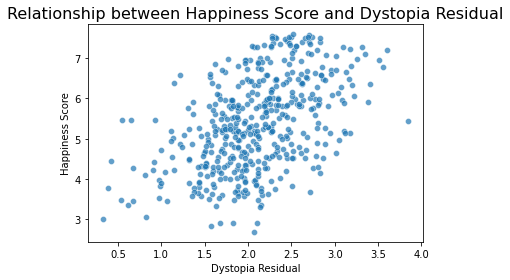

In [14]:
# Filter the data using a lambda function in assign
data = DataAllYears.assign(Dystopia_Residual_Filtered=lambda x: x['Dystopia Residual'].apply(lambda y: y != 0))

# Plot the scatterplot using a lambda function in query
sns.scatterplot(x="Dystopia Residual", y="Happiness Score", data=data.query("Dystopia_Residual_Filtered"), alpha=0.7)
plt.xlabel("Dystopia Residual")
plt.ylabel("Happiness Score")
plt.title("Relationship between Happiness Score and Dystopia Residual", fontsize=16)
plt.show()


# Data Analysis



After looking at my graphs and data I have concluded that there is a big difference living North America and Western Europe and their happiness compared to all the other regions of the world and I want to focus on comparing these regions and seeing what exactly contributes the most to their happiness compared to the other regions.

I also believe only using the DataAllRegion is the best data as it has the most information while containing all the correct data on the regions.

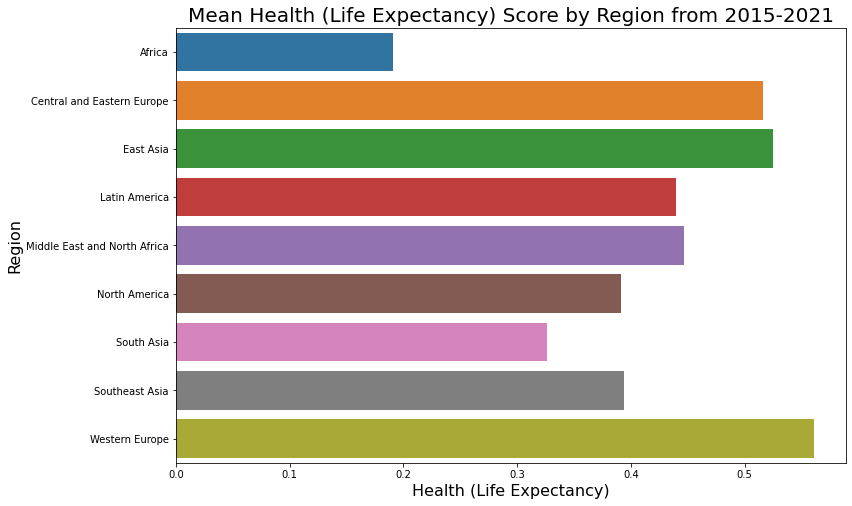

In [18]:
pf.region_barplot(DataAllRegion,'Health (Life Expectancy)')


By looking at this visualization there is a clear difference in life expectancy in Western Europe however to my surprise the expentancy in North America is signfigantly less than expected.

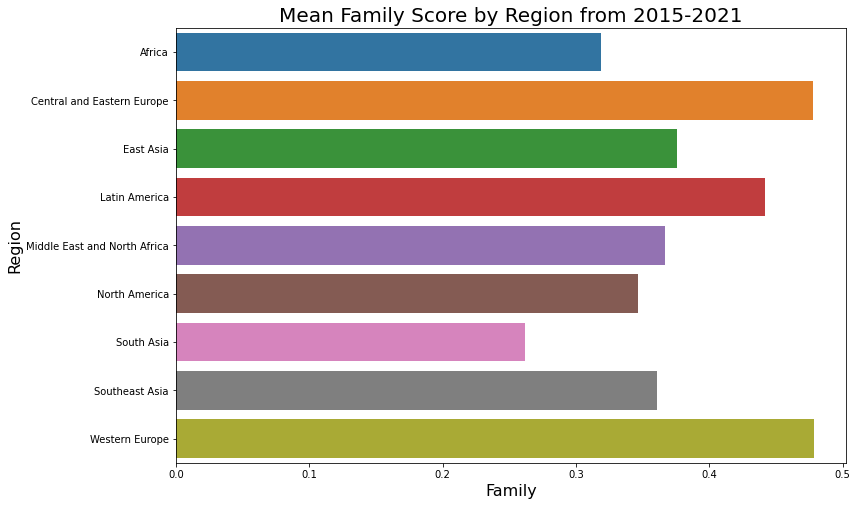

In [19]:
pf.region_barplot(DataAllRegion,'Family')

With family the same trend is showing, Western Europe is the best worldwide however North America is also less than compared to the other regions. Like Central Europe and Latin America have signifcalnly more Family vs North America.

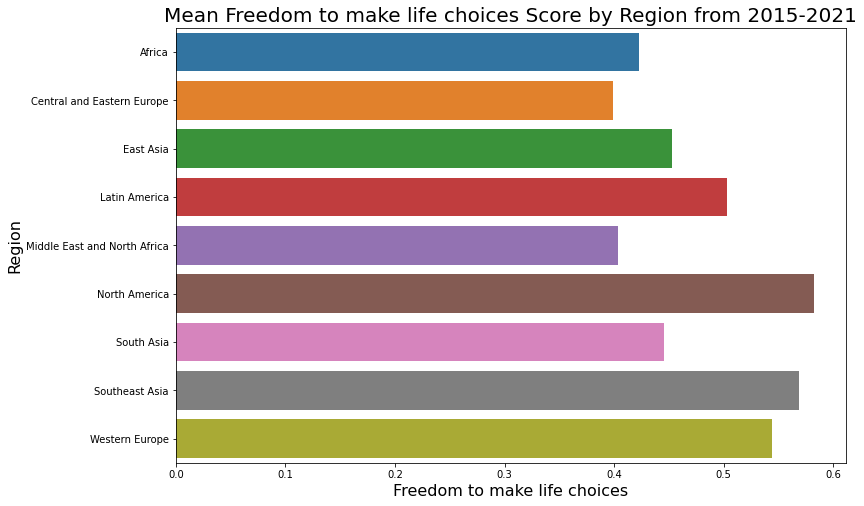

In [20]:
pf.region_barplot(DataAllRegion,'Freedom to make life choices')

This has been the area in which Western Europe is not the number one spot and North America is the best in this category

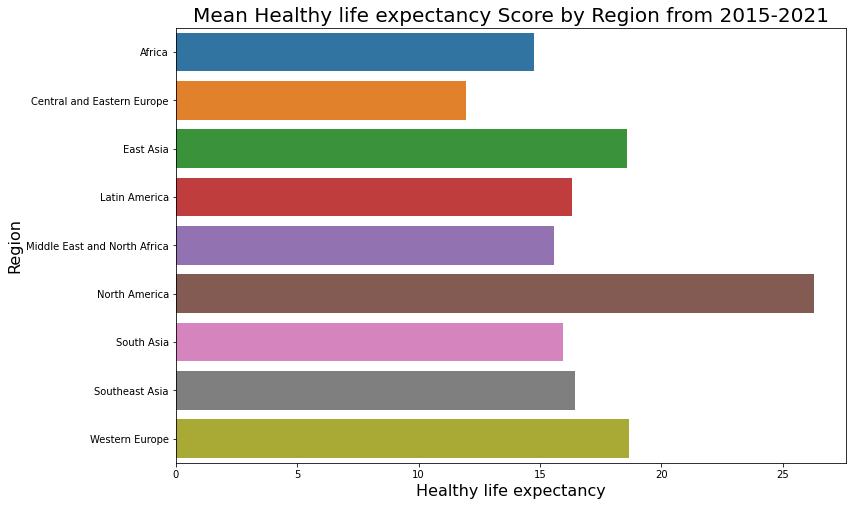

In [21]:
pf.region_barplot(DataAllRegion,'Healthy life expectancy')

This metric which is not just life expectancy but a healthy life expecatancy and North Ameria much greater than any of regions, much more so than Western Europe even.